<a href="https://colab.research.google.com/github/Nguyen-Van-Truong/ML2023/blob/main/Lab_4_20130187_NguyenVanTruong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [ ]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/lab4'
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

classifier = LogisticRegression(random_state = 0)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML/lab4


#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




Accuracy :  1.0


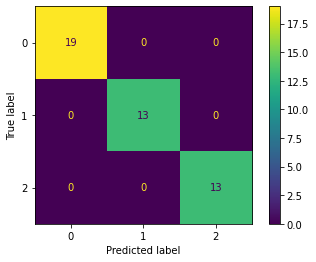

In [ ]:
# code
data4 = datasets.load_iris()
X = data4.data
Y = data4.target

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
lr1 = LogisticRegression(random_state=41)
lr1.fit(X_train,Y_train)

y_pred = lr1.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)
print ("Accuracy : ", accuracy_score(Y_test, y_pred))

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  0.9537037037037037


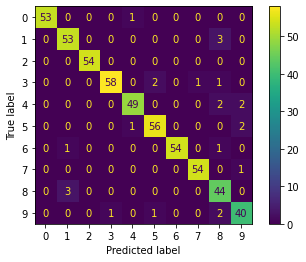

In [ ]:
# code
# load the MNIST digits dataset
mnist = datasets.load_digits()
mnist

X = mnist.data
Y = mnist.target

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
lr1 = LogisticRegression(random_state=41)
lr1.fit(X_train,Y_train)

y_pred = lr1.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)
print ("Accuracy : ", accuracy_score(Y_test, y_pred))



#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


3.1


k= 1 Accuracy: 1.0
k= 3 Accuracy: 1.0
k= 5 Accuracy: 1.0
k= 7 Accuracy: 1.0
k= 9 Accuracy: 1.0
k= 11 Accuracy: 1.0
k= 13 Accuracy: 1.0
k= 15 Accuracy: 1.0
k= 17 Accuracy: 1.0
k= 19 Accuracy: 1.0
k= 21 Accuracy: 1.0
k= 23 Accuracy: 1.0
k= 25 Accuracy: 1.0
k= 27 Accuracy: 1.0
k= 29 Accuracy: 1.0


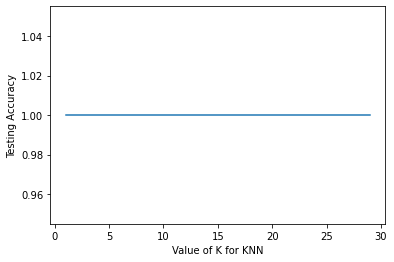

In [ ]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define k values
k_values = range(1, 30, 2)

# Train and test the model for each k value
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print("k=", k, "Accuracy:", score)

# Plot accuracy scores for each k value
plt.plot(k_values, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

3.2

In [ ]:
# Train and test the logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Print classification report for logistic regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Train and test the kNN model with best k value (k=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Print classification report for kNN with k=1
print("Classification Report for kNN (k=1):")
print(classification_report(y_test, y_pred_knn))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Classification Report for kNN (k=1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [ ]:

# load the MNIST digits dataset
mnist = load_digits()

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




# try different values of k
k_values = list(range(1, 30, 2))

# evaluate kNN with each k value
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print("k =", k, "  accuracy =", accuracy)

# find the best k
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("Best k:", best_k)


k = 1   accuracy = 0.9740740740740741
k = 3   accuracy = 0.9685185185185186
k = 5   accuracy = 0.975925925925926
k = 7   accuracy = 0.975925925925926
k = 9   accuracy = 0.975925925925926
k = 11   accuracy = 0.9722222222222222
k = 13   accuracy = 0.9592592592592593
k = 15   accuracy = 0.9481481481481482
k = 17   accuracy = 0.9425925925925925
k = 19   accuracy = 0.9425925925925925
k = 21   accuracy = 0.9407407407407408
k = 23   accuracy = 0.937037037037037
k = 25   accuracy = 0.9314814814814815
k = 27   accuracy = 0.937037037037037
k = 29   accuracy = 0.937037037037037
Best k: 5


4.2


In [ ]:

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# kNN with best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# evaluate metrics
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))

print("\nkNN (k={})".format(best_k))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.9261672095548317
Precision: 0.926097432323389
Recall: 0.9261672095548317
F1 Score: 0.9260606666680338

kNN (k=5)
Accuracy: 0.7904451682953312
Precision: 0.7895586394937039
Recall: 0.7904451682953312
F1 Score: 0.7890803154172036


#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [ ]:
# code
spambase = pd.read_csv("spambase.csv")
spambase

X = spambase.iloc[:, :-1].values
y = spambase.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=42)

dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)


dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)
lr_pred = lr.predict(X_test)

print("Decision Tree:")
print(classification_report(y_test, dt_pred))
print("kNN:")
print(classification_report(y_test, knn_pred))
print("Logistic Regression:")
print(classification_report(y_test, lr_pred))



Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       531
           1       0.92      0.88      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921

kNN:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       531
           1       0.77      0.71      0.74       390

    accuracy                           0.79       921
   macro avg       0.79      0.78      0.78       921
weighted avg       0.79      0.79      0.79       921

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       531
           1       0.92      0.90      0.91       390

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Finally,
Save a copy in your Github. Remember renaming the notebook.